In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from math import *

PI = np.pi
m21 = 8.66e-3
m31 = 5.05e-2

In [107]:
def trigconversion(a):
    return np.sqrt(1 - np.power(a, 2))

def m2(m):
    return np.sqrt(m21 + np.power(m, 2))

def m3(m):
    return np.sqrt(m31 + np.power(m, 2))


def mee(mlight, s12, s13):
    return np.power(trigconversion(s13), 2) * (np.power(trigconversion(s12), 2)*mlight + m2(mlight) * np.power(s12, 2)) + m3(mlight) * np.power(s13, 2)

def mmumu(mlight, s12, s13, s23, delta):
    return 2*trigconversion(s12)*trigconversion(s23)*(mlight - m2(mlight))*s12*s13*s23*np.cos(delta) + np.power(trigconversion(s23), 2)*(np.power(trigconversion(s12),2)*m2(mlight) + mlight*np.power(s12, 2)) + np.power(s23, 2)*(np.power(s13,2)*(np.power(trigconversion(s12), 2)*mlight + m2(mlight)*np.power(s12, 2)) + np.power(trigconversion(s13),2)*m3(mlight))

def mtautau(m, s12, s13, s23, delta):
    return 2*trigconversion(s12)*trigconversion(s23)*(m2(m) - m)*s12*s13*s23*cos(delta) + pow(trigconversion(s23),2)*(pow(s13,2)*(pow(trigconversion(s12),2)*m+m2(m)*pow(s12,2))+m3(m)*pow(trigconversion(s13),2)) + pow(s23,2)*(m2(m)*pow(trigconversion(s12),2) + m*pow(s12,2))

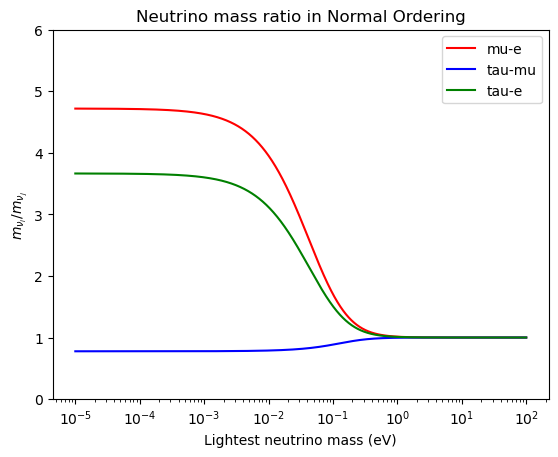

In [109]:
m = np.logspace(-5, 2, 10000)
plt.plot(m, mmumu(m, 5.64e-1, 1.48e-1, 7.58e-1, 1.08*np.pi)/mee(m, 5.64e-1, 1.48e-1), 'r-', label = "mu-e")
plt.plot(m, mtautau(m, 5.64e-1, 1.48e-1, 7.58e-1, 1.08*np.pi)/mmumu(m, 5.64e-1, 1.48e-1, 7.58e-1, 1.08*np.pi), 'b-', label = "tau-mu")
plt.plot(m, mtautau(m, 5.64e-1, 1.48e-1, 7.58e-1, 1.08*np.pi)/mee(m, 5.64e-1, 1.48e-1), 'g-', label = "tau-e")
plt.xscale('log')
plt.ylim(0,6)
plt.legend(loc=0)
plt.xlabel("Lightest neutrino mass (eV)")
plt.ylabel(r"$m_{\nu_i}/m_{\nu_j}$")
plt.title("Neutrino mass ratio in Normal Ordering")
plt.savefig('NO.png', dpi=300)